In [23]:
# import relevant libraries
import pandas as pd
import numpy as np
import re
import ast
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
# import the data scrapped from youtube into a dataframe
video_df = pd.read_csv("data/videos_unprepared.csv", parse_dates=["published_at"])
video_df.head()

,video_id,title,description,published_at,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,comment_count,channel_id
0,i_wWK_n83LE,Wayne Hsiung Jailed,Original reel @DirectActionEverywhere : https:...,2023-11-05 00:21:07+00:00,SaLADS,22,[],PT34S,hd,False,2509,69,2,UCNZgGEAMXy0mweOYLHZPINw
1,2w5AWKDdV9g,This Speech Will Make You Go Vegan! - Clif Gra...,It's been a couple of years since I last spoke...,2022-04-08 20:56:09+00:00,Clif Grant,22,[],PT57M33S,hd,False,1556,237,75,UChD3chubIKyNo0Z2TppQ-Fw
2,iVXsjWxaTFQ,Animal Liberation Front (ALF) –Raid Interfauna...,17 March 1990 – ALF liberates more than 100 an...,2021-10-07 18:41:22+00:00,Alex Punx,29,"['animal liberation front', 'frente de liberac...",PT51S,sd,False,1712,85,5,UCi919GSAtsLqFHjMnuWVm9Q
3,tKUv8JrrzSY,Vegan Kills More Animals 🤯| Ted Nugent,Ted Nugent Explains How Vegan Kills More Anima...,2023-01-31 12:30:32+00:00,Business Bulls,22,"['Business', 'success', 'investing', 'finance'...",PT46S,hd,False,108193,5506,742,UC-YvsfPu6tlCAd8AQUyoWRg
4,yg1qRQt5z7c,Meat Eater Reacts to HEARTBREAKING Activism Fo...,A quick street conversation with a non-vegan m...,2020-11-16 19:00:08+00:00,Edmonton Vegan Outreach,29,"['Cube of Truth', 'Anonymous for the Voiceless...",PT2M21S,hd,False,378,44,1,UCsU5QtzfvVX2DFcmIYM3aRg


In [25]:
video_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   video_id       978 non-null    object             
 1   title          978 non-null    object             
 2   description    883 non-null    object             
 3   published_at   978 non-null    datetime64[ns, UTC]
 4   channel_title  978 non-null    object             
 5   category_id    978 non-null    int64              
 6   tags           978 non-null    object             
 7   duration       978 non-null    object             
 8   definition     978 non-null    object             
 9   caption        978 non-null    bool               
 10  view_count     978 non-null    int64              
 11  like_count     978 non-null    int64              
 12  comment_count  978 non-null    int64              
 13  channel_id     978 non-null    object             

In [26]:
# Add hour, weekday and month published columns
video_df["hour_published"] = video_df["published_at"].dt.hour
video_df["weekday_published"] = video_df["published_at"].dt.weekday
video_df["month_published"] = video_df["published_at"].dt.month
video_df.drop(columns="published_at", inplace=True)
video_df.head()


,video_id,title,description,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,comment_count,channel_id,hour_published,weekday_published,month_published
0,i_wWK_n83LE,Wayne Hsiung Jailed,Original reel @DirectActionEverywhere : https:...,SaLADS,22,[],PT34S,hd,False,2509,69,2,UCNZgGEAMXy0mweOYLHZPINw,0,6,11
1,2w5AWKDdV9g,This Speech Will Make You Go Vegan! - Clif Gra...,It's been a couple of years since I last spoke...,Clif Grant,22,[],PT57M33S,hd,False,1556,237,75,UChD3chubIKyNo0Z2TppQ-Fw,20,4,4
2,iVXsjWxaTFQ,Animal Liberation Front (ALF) –Raid Interfauna...,17 March 1990 – ALF liberates more than 100 an...,Alex Punx,29,"['animal liberation front', 'frente de liberac...",PT51S,sd,False,1712,85,5,UCi919GSAtsLqFHjMnuWVm9Q,18,3,10
3,tKUv8JrrzSY,Vegan Kills More Animals 🤯| Ted Nugent,Ted Nugent Explains How Vegan Kills More Anima...,Business Bulls,22,"['Business', 'success', 'investing', 'finance'...",PT46S,hd,False,108193,5506,742,UC-YvsfPu6tlCAd8AQUyoWRg,12,1,1
4,yg1qRQt5z7c,Meat Eater Reacts to HEARTBREAKING Activism Fo...,A quick street conversation with a non-vegan m...,Edmonton Vegan Outreach,29,"['Cube of Truth', 'Anonymous for the Voiceless...",PT2M21S,hd,False,378,44,1,UCsU5QtzfvVX2DFcmIYM3aRg,19,0,11


In [27]:
# import the category & channel data and merge it to the video dataframe
categories = pd.read_csv("data/categories.csv")
channels = pd.read_csv("data/channels.csv")
video_df = video_df.merge(categories, on="category_id").merge(channels, on="channel_id").drop(columns=["category_id", "channel_id"])
video_df.head()

,video_id,title,description,channel_title,tags,duration,definition,caption,view_count,like_count,comment_count,hour_published,weekday_published,month_published,category,channel_name,channel_view_count,channel_sub_count,channel_video_count
0,i_wWK_n83LE,Wayne Hsiung Jailed,Original reel @DirectActionEverywhere : https:...,SaLADS,[],PT34S,hd,False,2509,69,2,0,6,11,People & Blogs,SaLADS,151430,1610,314
1,2w5AWKDdV9g,This Speech Will Make You Go Vegan! - Clif Gra...,It's been a couple of years since I last spoke...,Clif Grant,[],PT57M33S,hd,False,1556,237,75,20,4,4,People & Blogs,Clif Grant,381041,4300,218
2,iVXsjWxaTFQ,Animal Liberation Front (ALF) –Raid Interfauna...,17 March 1990 – ALF liberates more than 100 an...,Alex Punx,"['animal liberation front', 'frente de liberac...",PT51S,sd,False,1712,85,5,18,3,10,Nonprofits & Activism,Alex Punx,2885119,6420,846
3,tKUv8JrrzSY,Vegan Kills More Animals 🤯| Ted Nugent,Ted Nugent Explains How Vegan Kills More Anima...,Business Bulls,"['Business', 'success', 'investing', 'finance'...",PT46S,hd,False,108193,5506,742,12,1,1,People & Blogs,Business Bulls,98794447,169000,622
4,yg1qRQt5z7c,Meat Eater Reacts to HEARTBREAKING Activism Fo...,A quick street conversation with a non-vegan m...,Edmonton Vegan Outreach,"['Cube of Truth', 'Anonymous for the Voiceless...",PT2M21S,hd,False,378,44,1,19,0,11,Nonprofits & Activism,Edmonton Vegan Outreach,53670,885,129


In [28]:
# convert duration into total seconds
hours = video_df["duration"].str.extract(r"PT(\d+)H")[0].fillna(0).astype(int)
minutes = video_df["duration"].str.extract(r"(\d+)M")[0].fillna(0).astype(int)
seconds = video_df["duration"].str.extract(r"(\d+)S")[0].fillna(0).astype(int)
duration = pd.to_timedelta(hours, unit="hours") + pd.to_timedelta(minutes, unit="minutes") + pd.to_timedelta(seconds, unit="seconds")
video_df["duration_seconds"] = duration.dt.total_seconds().astype(int)
video_df.drop(columns="duration", inplace=True)
video_df.head()


,video_id,title,description,channel_title,tags,definition,caption,view_count,like_count,comment_count,hour_published,weekday_published,month_published,category,channel_name,channel_view_count,channel_sub_count,channel_video_count,duration_seconds
0,i_wWK_n83LE,Wayne Hsiung Jailed,Original reel @DirectActionEverywhere : https:...,SaLADS,[],hd,False,2509,69,2,0,6,11,People & Blogs,SaLADS,151430,1610,314,34
1,2w5AWKDdV9g,This Speech Will Make You Go Vegan! - Clif Gra...,It's been a couple of years since I last spoke...,Clif Grant,[],hd,False,1556,237,75,20,4,4,People & Blogs,Clif Grant,381041,4300,218,3453
2,iVXsjWxaTFQ,Animal Liberation Front (ALF) –Raid Interfauna...,17 March 1990 – ALF liberates more than 100 an...,Alex Punx,"['animal liberation front', 'frente de liberac...",sd,False,1712,85,5,18,3,10,Nonprofits & Activism,Alex Punx,2885119,6420,846,51
3,tKUv8JrrzSY,Vegan Kills More Animals 🤯| Ted Nugent,Ted Nugent Explains How Vegan Kills More Anima...,Business Bulls,"['Business', 'success', 'investing', 'finance'...",hd,False,108193,5506,742,12,1,1,People & Blogs,Business Bulls,98794447,169000,622,46
4,yg1qRQt5z7c,Meat Eater Reacts to HEARTBREAKING Activism Fo...,A quick street conversation with a non-vegan m...,Edmonton Vegan Outreach,"['Cube of Truth', 'Anonymous for the Voiceless...",hd,False,378,44,1,19,0,11,Nonprofits & Activism,Edmonton Vegan Outreach,53670,885,129,141


In [29]:
# update definition and caption to binary variables (0 = sd, 1 = hd & 0 = False, 1 = True)
video_df["hd"] = np.where(video_df["definition"] == "hd", 1, 0)
video_df["caption"] = np.where(video_df["caption"] == True, 1, 0)
video_df.drop(columns="definition", inplace=True)
video_df.head()

,video_id,title,description,channel_title,tags,caption,view_count,like_count,comment_count,hour_published,weekday_published,month_published,category,channel_name,channel_view_count,channel_sub_count,channel_video_count,duration_seconds,hd
0,i_wWK_n83LE,Wayne Hsiung Jailed,Original reel @DirectActionEverywhere : https:...,SaLADS,[],0,2509,69,2,0,6,11,People & Blogs,SaLADS,151430,1610,314,34,1
1,2w5AWKDdV9g,This Speech Will Make You Go Vegan! - Clif Gra...,It's been a couple of years since I last spoke...,Clif Grant,[],0,1556,237,75,20,4,4,People & Blogs,Clif Grant,381041,4300,218,3453,1
2,iVXsjWxaTFQ,Animal Liberation Front (ALF) –Raid Interfauna...,17 March 1990 – ALF liberates more than 100 an...,Alex Punx,"['animal liberation front', 'frente de liberac...",0,1712,85,5,18,3,10,Nonprofits & Activism,Alex Punx,2885119,6420,846,51,0
3,tKUv8JrrzSY,Vegan Kills More Animals 🤯| Ted Nugent,Ted Nugent Explains How Vegan Kills More Anima...,Business Bulls,"['Business', 'success', 'investing', 'finance'...",0,108193,5506,742,12,1,1,People & Blogs,Business Bulls,98794447,169000,622,46,1
4,yg1qRQt5z7c,Meat Eater Reacts to HEARTBREAKING Activism Fo...,A quick street conversation with a non-vegan m...,Edmonton Vegan Outreach,"['Cube of Truth', 'Anonymous for the Voiceless...",0,378,44,1,19,0,11,Nonprofits & Activism,Edmonton Vegan Outreach,53670,885,129,141,1


In [30]:
# remove shorts from the dataframe
video_df_filtered = video_df[~video_df["title"].str.contains("#shorts")]
video_df_filtered.shape

(958, 19)

In [31]:
# check unique channel names
video_df_filtered["channel_name"].unique()

array(['SaLADS', 'Clif Grant', 'Alex Punx', 'Business Bulls',
       'Edmonton Vegan Outreach', 'Earthling Ed', 'VLNOW', 'David Ramms',
       'Mic the Vegan', 'Vegan Pixie Warrior', 'earthlingsthemovie',
       'Gillian Berry', 'Rich Roll', 'Joey Carbstrong', 'Stichting NoFap',
       'Vegan Outreach', 'Thee Burger Dude', 'KRQE', 'Seb Alex',
       'Lex Clips', 'Dr Sermed Mezher', 'PureCarbs', 'TEDx Talks',
       'Those Annoying Vegans', 'Renaissance Periodization',
       'PLANT BASED NEWS', 'Matt Ross', 'Arvind Animal Activist', 'VFC',
       'The Ethical Compass', 'FullyRawKristina', 'sixteenleo',
       'Vegan Gains', 'Plant Strength', 'Vegan Gains Clips',
       'Entyce The Lyrical Vegan', 'Peter Rogers MD', 'KenDBerryMD',
       'Good Morning Britain', 'Being Enlightened',
       'Last Chance for Animals', 'sethpajak', 'voicetheunheard',
       'Last Night On Destiny', "Men's Health",
       'Veganism EXPOSED Official ', 'Brut India',
       'Direct Action Everywhere - DxE', 'T

In [32]:
# filter out unwanted channels
remove_channels = ["Business Bulls", "VLNOW", "Stichting NoFap", "KRQE", "Renaissance Periodization", "sixteenleo", "KenDBerryMD", "Good Morning Britain", "Men's Health", "Veganism EXPOSED Official ", "Type One Talks", "TheSeriousfitness", "TransformXRED - Delray Misfits Museum",
                   "BBC Global", "Fly & Shy", "Greg Doucette", "Vegan Deterioration", "Physicians Committee", "WPTV News - FL Palm Beaches and Treasure Coast", "HustleTalk", "GradeAUnderA", "Addis Miller", "Lolcows of the Internet", "The Funny Republican", "Goodmorning1221",
                   "Big Craig", "news.com.au", "Bonnelli Factory DGG", "DawahWise", "The Young Turks", "Meditate Like a Jedi with Lama Jigme Gyatso", "Shannen Michaela ", "Muscle & Strength", "BBC World Service", "Health Coach Joff", "BS w/ Jake Paul", "LMAOF", "ITV Gold",
                   "Projector Jenna Ortega", "The Iced Coffee Hour", "Fitxfearless Clips", "Doctor Mike", "Bobby's Perspective", "TinkABoutDis", "Piers Morgan Uncensored", "Internet Anarchist", "AsapSCIENCE", "Vince Goodrum", "Isaac Butterfield", "FITXFEARLESS", "Learn with Jaspal", 
                   "Vaibhav Shukla", "Alec Gunter", "Philosophy Sam", "VICE", "Insider Tech", "KPIX | CBS NEWS BAY AREA", "WIRED", "Rina", "Habitat Botanicals", "GBNews", "odoublegg", "Caleb Maupin", "Playing With Fire", "Frank Tufano", "Rachael Ray Show", "MehtaEthics",
                   "The Flip Flop Report", "Warrior Mentality", "Next Level Stuff", "Goatis", "ASH Loves Condiments", "SenyaiGrubs", "Simply Just Cee!", "Dave Feldman"]

video_df_filtered = video_df[~video_df["channel_name"].isin(remove_channels)]
video_df_filtered.shape

(879, 19)

In [33]:
# one-hot encode the categories column dropping the redundant first column (Autos & Vehicles)
categories = pd.get_dummies(video_df_filtered["category"], dtype=int, drop_first=True, prefix="cat")
video_df_filtered = pd.concat([video_df_filtered.reset_index(drop=True), categories.reset_index(drop=True)], axis=1).drop(columns=["category", "channel_name"])
pd.set_option("display.max_columns", 50)
video_df_filtered.head()

,video_id,title,description,channel_title,tags,caption,view_count,like_count,comment_count,hour_published,weekday_published,month_published,channel_view_count,channel_sub_count,channel_video_count,duration_seconds,hd,cat_Comedy,cat_Education,cat_Entertainment,cat_Film & Animation,cat_Gaming,cat_Howto & Style,cat_Music,cat_News & Politics,cat_Nonprofits & Activism,cat_People & Blogs,cat_Pets & Animals,cat_Science & Technology,cat_Sports,cat_Travel & Events
0,i_wWK_n83LE,Wayne Hsiung Jailed,Original reel @DirectActionEverywhere : https:...,SaLADS,[],0,2509,69,2,0,6,11,151430,1610,314,34,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2w5AWKDdV9g,This Speech Will Make You Go Vegan! - Clif Gra...,It's been a couple of years since I last spoke...,Clif Grant,[],0,1556,237,75,20,4,4,381041,4300,218,3453,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,iVXsjWxaTFQ,Animal Liberation Front (ALF) –Raid Interfauna...,17 March 1990 – ALF liberates more than 100 an...,Alex Punx,"['animal liberation front', 'frente de liberac...",0,1712,85,5,18,3,10,2885119,6420,846,51,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,yg1qRQt5z7c,Meat Eater Reacts to HEARTBREAKING Activism Fo...,A quick street conversation with a non-vegan m...,Edmonton Vegan Outreach,"['Cube of Truth', 'Anonymous for the Voiceless...",0,378,44,1,19,0,11,53670,885,129,141,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,OHi9VF_0CFM,Difficulties with Non-Vegan Friends & Family (...,Advice with dealing with non-vegan friends and...,Earthling Ed,"['earthlinged', 'earthling ed', 'vegan', 'vega...",1,204645,16510,2351,20,2,10,60458765,456000,379,794,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [34]:
# split up tags to get a value count
video_df_filtered["tags"] = video_df_filtered["tags"].apply(lambda x: ast.literal_eval(x))
all_tags = video_df_filtered["tags"].explode().str.lower()
tag_counts = all_tags.value_counts()
tag_counts

tags
vegan                                        369
veganism                                     223
animal rights                                149
earthling ed                                  95
activism                                      87
                                            ... 
wayne hsiung debates trent loos about fur      1
#makefurhistory                                1
ab 44                                          1
trent loos fur                                 1
trent loos                                     1
Name: count, Length: 4962, dtype: int64

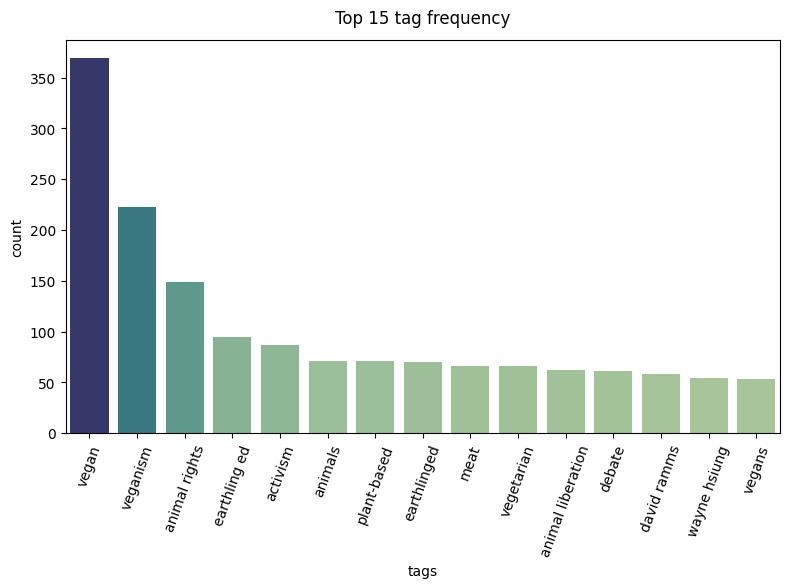

In [35]:
# visualize tag frequency
plt.subplots(figsize=(8, 6))
sns.barplot(x=tag_counts.index[:15], y=tag_counts.values[:15], palette="crest", hue=tag_counts[:15], legend=False)
plt.title("Top 15 tag frequency", y=1.02)
plt.ylabel("count")
plt.xticks(rotation=70)
plt.tight_layout()

# save png
plt.savefig("images/tag_frequency.png", dpi=300)

In [36]:
# create a binary column for each of the most popular tags and also a total tag count
popular_tags = ["vegan", "veganism", "animal rights", r"earthling ed|earthlinged", "activism", "animals", "plant-based", "meat", "vegetarian", "animal liberation", "debate"]

for pop_tag in popular_tags:
    video_df_filtered[f"tag_{pop_tag}"] = video_df_filtered["tags"].apply(
        lambda video_tags: int(any(re.search(pop_tag, video_tag) for video_tag in video_tags))
    )

video_df_filtered["tag_count"] = video_df_filtered["tags"].apply(lambda tags: len(tags))
video_df_filtered.drop(columns="tags", inplace=True)
video_df_filtered.head()

,video_id,title,description,channel_title,caption,view_count,like_count,comment_count,hour_published,weekday_published,month_published,channel_view_count,channel_sub_count,channel_video_count,duration_seconds,hd,cat_Comedy,cat_Education,cat_Entertainment,cat_Film & Animation,cat_Gaming,cat_Howto & Style,cat_Music,cat_News & Politics,cat_Nonprofits & Activism,cat_People & Blogs,cat_Pets & Animals,cat_Science & Technology,cat_Sports,cat_Travel & Events,tag_vegan,tag_veganism,tag_animal rights,tag_earthling ed|earthlinged,tag_activism,tag_animals,tag_plant-based,tag_meat,tag_vegetarian,tag_animal liberation,tag_debate,tag_count
0,i_wWK_n83LE,Wayne Hsiung Jailed,Original reel @DirectActionEverywhere : https:...,SaLADS,0,2509,69,2,0,6,11,151430,1610,314,34,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2w5AWKDdV9g,This Speech Will Make You Go Vegan! - Clif Gra...,It's been a couple of years since I last spoke...,Clif Grant,0,1556,237,75,20,4,4,381041,4300,218,3453,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,iVXsjWxaTFQ,Animal Liberation Front (ALF) –Raid Interfauna...,17 March 1990 – ALF liberates more than 100 an...,Alex Punx,0,1712,85,5,18,3,10,2885119,6420,846,51,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,8
3,yg1qRQt5z7c,Meat Eater Reacts to HEARTBREAKING Activism Fo...,A quick street conversation with a non-vegan m...,Edmonton Vegan Outreach,0,378,44,1,19,0,11,53670,885,129,141,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,1,36
4,OHi9VF_0CFM,Difficulties with Non-Vegan Friends & Family (...,Advice with dealing with non-vegan friends and...,Earthling Ed,1,204645,16510,2351,20,2,10,60458765,456000,379,794,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,1,0,0,25


In [37]:
# add title and description length
video_df_filtered["title_length"] = video_df_filtered["title"].apply(lambda title: len(title))
video_df_filtered["description_length"] = video_df_filtered["description"].apply(lambda description: len(str(description)))

# vectorize the term frequency of title and description
video_df_filtered["text"] = video_df_filtered["title"] + " " + video_df_filtered["description"].fillna("")

vectorizer = TfidfVectorizer(max_features=300, stop_words="english", min_df=3)
tf_idf_matrix = vectorizer.fit_transform(video_df_filtered["text"])

tf_idf_df = pd.DataFrame(tf_idf_matrix.toarray(), columns=[f"term_{term}" for term in vectorizer.get_feature_names_out()])
video_df_filtered = pd.concat([video_df_filtered.reset_index(drop=True), tf_idf_df.reset_index(drop=True)], axis=1)
video_df_filtered.head()

,video_id,title,description,channel_title,caption,view_count,like_count,comment_count,hour_published,weekday_published,month_published,channel_view_count,channel_sub_count,channel_video_count,duration_seconds,hd,cat_Comedy,cat_Education,cat_Entertainment,cat_Film & Animation,cat_Gaming,cat_Howto & Style,cat_Music,cat_News & Politics,cat_Nonprofits & Activism,...,term_ve,term_vegan,term_vegangains,term_veganism,term_vegans,term_veganuary,term_version,term_video,term_videos,term_visit,term_voiceless,term_vs,term_want,term_watch,term_way,term_wayne,term_website,term_winters,term_work,term_world,term_www,term_year,term_years,term_youtu,term_youtube
0,i_wWK_n83LE,Wayne Hsiung Jailed,Original reel @DirectActionEverywhere : https:...,SaLADS,0,2509,69,2,0,6,11,151430,1610,314,34,1,0,0,0,0,0,0,0,0,0,...,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.088991,0.000000,0.247868,0.0,0.0,0.000000,0.00000,0.353642,0.0,0.000000,0.0,0.243155
1,2w5AWKDdV9g,This Speech Will Make You Go Vegan! - Clif Gra...,It's been a couple of years since I last spoke...,Clif Grant,0,1556,237,75,20,4,4,381041,4300,218,3453,1,0,0,0,0,0,0,0,0,0,...,0.0000,0.189915,0.0,0.143766,0.087417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.096543,0.069543,0.220229,0.000000,0.0,0.0,0.000000,0.10113,0.092118,0.0,0.237726,0.0,0.063338
2,iVXsjWxaTFQ,Animal Liberation Front (ALF) –Raid Interfauna...,17 March 1990 – ALF liberates more than 100 an...,Alex Punx,0,1712,85,5,18,3,10,2885119,6420,846,51,0,0,0,0,0,0,0,0,0,1,...,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.066739,0.0,0.000000,0.0,0.000000
3,yg1qRQt5z7c,Meat Eater Reacts to HEARTBREAKING Activism Fo...,A quick street conversation with a non-vegan m...,Edmonton Vegan Outreach,0,378,44,1,19,0,11,53670,885,129,141,1,0,0,0,0,0,0,0,0,1,...,0.0000,0.235771,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000
4,OHi9VF_0CFM,Difficulties with Non-Vegan Friends & Family (...,Advice with dealing with non-vegan friends and...,Earthling Ed,1,204645,16510,2351,20,2,10,60458765,456000,379,794,1,0,0,0,0,0,0,0,0,1,...,0.2583,0.263797,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.162163,0.00000,0.000000,0.0,0.000000,0.0,0.000000


In [39]:
# drop no longer needed columns (including like_count and comment_count to avoid data leakage)
remove_columns = ["description", "text", "like_count", "comment_count"]
video_df_filtered.drop(columns=remove_columns, inplace=True)
video_df_filtered.head()

,video_id,title,channel_title,caption,view_count,hour_published,weekday_published,month_published,channel_view_count,channel_sub_count,channel_video_count,duration_seconds,hd,cat_Comedy,cat_Education,cat_Entertainment,cat_Film & Animation,cat_Gaming,cat_Howto & Style,cat_Music,cat_News & Politics,cat_Nonprofits & Activism,cat_People & Blogs,cat_Pets & Animals,cat_Science & Technology,...,term_ve,term_vegan,term_vegangains,term_veganism,term_vegans,term_veganuary,term_version,term_video,term_videos,term_visit,term_voiceless,term_vs,term_want,term_watch,term_way,term_wayne,term_website,term_winters,term_work,term_world,term_www,term_year,term_years,term_youtu,term_youtube
0,i_wWK_n83LE,Wayne Hsiung Jailed,SaLADS,0,2509,0,6,11,151430,1610,314,34,1,0,0,0,0,0,0,0,0,0,1,0,0,...,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.088991,0.000000,0.247868,0.0,0.0,0.000000,0.00000,0.353642,0.0,0.000000,0.0,0.243155
1,2w5AWKDdV9g,This Speech Will Make You Go Vegan! - Clif Gra...,Clif Grant,0,1556,20,4,4,381041,4300,218,3453,1,0,0,0,0,0,0,0,0,0,1,0,0,...,0.0000,0.189915,0.0,0.143766,0.087417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.096543,0.069543,0.220229,0.000000,0.0,0.0,0.000000,0.10113,0.092118,0.0,0.237726,0.0,0.063338
2,iVXsjWxaTFQ,Animal Liberation Front (ALF) –Raid Interfauna...,Alex Punx,0,1712,18,3,10,2885119,6420,846,51,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.066739,0.0,0.000000,0.0,0.000000
3,yg1qRQt5z7c,Meat Eater Reacts to HEARTBREAKING Activism Fo...,Edmonton Vegan Outreach,0,378,19,0,11,53670,885,129,141,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0.0000,0.235771,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000
4,OHi9VF_0CFM,Difficulties with Non-Vegan Friends & Family (...,Earthling Ed,1,204645,20,2,10,60458765,456000,379,794,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0.2583,0.263797,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.162163,0.00000,0.000000,0.0,0.000000,0.0,0.000000


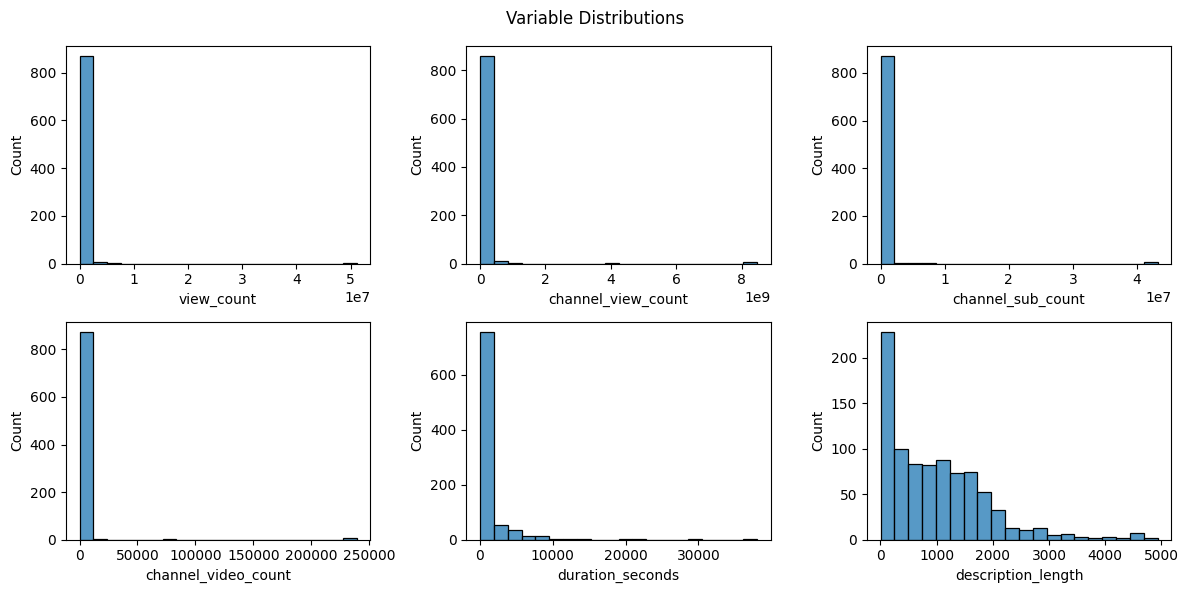

In [40]:
# check distributions for possible skew
check_distributions = ["view_count", "channel_view_count", "channel_sub_count", "channel_video_count", "duration_seconds", "description_length"]

fig, axes = plt.subplots(2, 3, figsize=(12, 6))
fig.suptitle("Variable Distributions")
i, j = 0, 0
for col in check_distributions:
    sns.histplot(ax=axes[i, j], x=video_df_filtered[col], bins=20)
    j += 1
    if j == 3:
        i += 1
        j = 0
plt.tight_layout()
plt.savefig("images/variable_distributions.png", dpi=300)

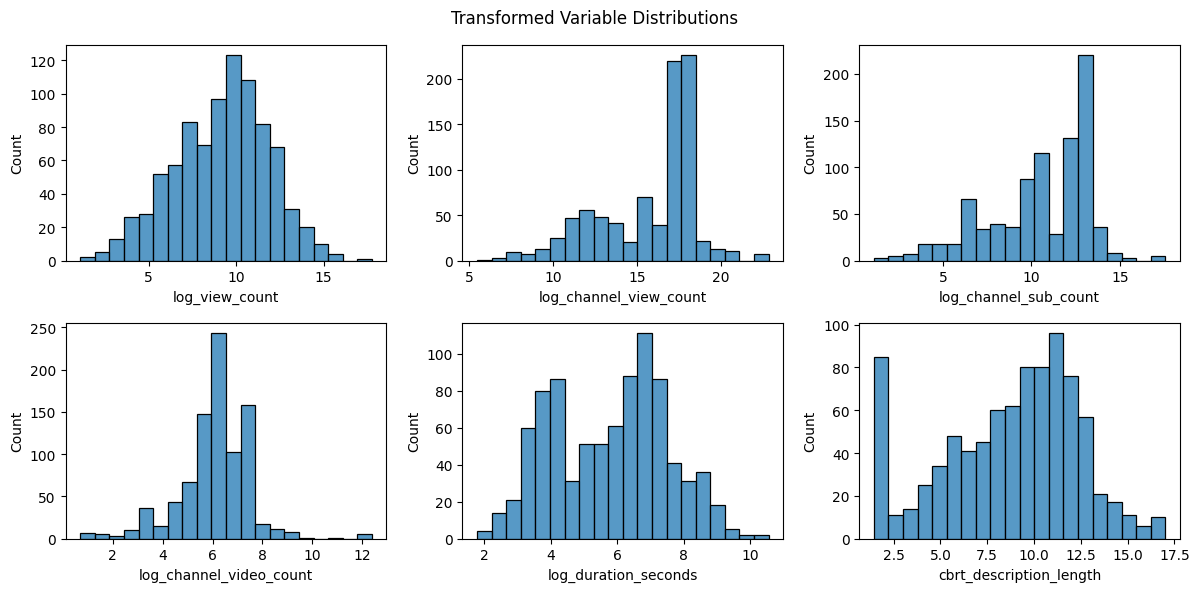

In [41]:
# transform the skewed variables to normalize the data
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
fig.suptitle("Transformed Variable Distributions")
i, j = 0, 0
for col in check_distributions:
    if col != "description_length":
        video_df_filtered[f"log_{col}"] = np.log1p(video_df_filtered[col])
        sns.histplot(ax=axes[i, j], x=video_df_filtered[f"log_{col}"], bins=20)
    else:
        video_df_filtered[f"cbrt_{col}"] = np.cbrt(video_df_filtered[col])
        sns.histplot(ax=axes[i, j], x=video_df_filtered[f"cbrt_{col}"], bins=20)
    j += 1
    if j == 3:
        i += 1
        j = 0
plt.tight_layout()
plt.savefig("images/transformed_variable_distributions.png", dpi=300)

In [42]:
# drop old non-transformed variables
video_df_filtered.drop(columns=check_distributions, inplace=True)
video_df_filtered.head()

,video_id,title,channel_title,caption,hour_published,weekday_published,month_published,hd,cat_Comedy,cat_Education,cat_Entertainment,cat_Film & Animation,cat_Gaming,cat_Howto & Style,cat_Music,cat_News & Politics,cat_Nonprofits & Activism,cat_People & Blogs,cat_Pets & Animals,cat_Science & Technology,cat_Sports,cat_Travel & Events,tag_vegan,tag_veganism,tag_animal rights,...,term_version,term_video,term_videos,term_visit,term_voiceless,term_vs,term_want,term_watch,term_way,term_wayne,term_website,term_winters,term_work,term_world,term_www,term_year,term_years,term_youtu,term_youtube,log_view_count,log_channel_view_count,log_channel_sub_count,log_channel_video_count,log_duration_seconds,cbrt_description_length
0,i_wWK_n83LE,Wayne Hsiung Jailed,SaLADS,0,0,6,11,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.088991,0.000000,0.247868,0.0,0.0,0.000000,0.00000,0.353642,0.0,0.000000,0.0,0.243155,7.828038,11.927885,7.384610,5.752573,3.555348,9.976612
1,2w5AWKDdV9g,This Speech Will Make You Go Vegan! - Clif Gra...,Clif Grant,0,20,4,4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.096543,0.069543,0.220229,0.000000,0.0,0.0,0.000000,0.10113,0.092118,0.0,0.237726,0.0,0.063338,7.350516,12.850665,8.366603,5.389072,8.147288,11.965177
2,iVXsjWxaTFQ,Animal Liberation Front (ALF) –Raid Interfauna...,Alex Punx,0,18,3,10,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.066739,0.0,0.000000,0.0,0.000000,7.446001,14.875077,8.767329,6.741701,3.951244,13.871269
3,yg1qRQt5z7c,Meat Eater Reacts to HEARTBREAKING Activism Fo...,Edmonton Vegan Outreach,0,19,0,11,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,5.937536,10.890628,6.786717,4.867534,4.955827,5.325074
4,OHi9VF_0CFM,Difficulties with Non-Vegan Friends & Family (...,Earthling Ed,1,20,2,10,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.162163,0.00000,0.000000,0.0,0.000000,0.0,0.000000,12.229037,17.917472,13.030250,5.940171,6.678342,6.431228


In [43]:
# save prepared data
video_df_filtered.to_csv("data/videos_prepared.csv", index=False)